# **Group member's names:**
- رايه مبارك الدوسري
- نوره سعود الرشود
- منار ظافر الاحمري
- حصة محمد المجلي
- لمياء عبدالله السالم


# **-	Domain: Public Policy and Governance**
# **- Problem Statement:**
•	This project aims to look at the drivers of national happiness due to economic, social, psychological, and environmental factors. We try through the identification and analyses of these drivers to provide evidence-based insights to inform policy decisions that promote strategies for improving general well-being among the citizens. Clearly, such interlinked factors make holistic policies of happiness and quality of life one of the most important underpinnings toward a fulfilled and resilient society.

### **- How do variables such as GDP per capita, social support, life expectancy, freedom of choice, generosity, and perceptions of corruption impact the overall happiness levels (Life Ladder) of countries, and what strategies can governments implement to improve national well-being?**

# **Dataset Overview:**
• **Country name:** Name of the country from which data is being analyzed.

• **Year:** This defines the year in which this particular data was taken.

• **Life Ladder:** The level of happiness, or satisfaction with life. The dependent variable.

• **Log GDP per capita**: This is indicative of the economic production of a country.

• **Social support:** Provides a quantitative measure of the extent to which citizens of a country feel they have social support.

• **Healthy life expectancy at birth:** This shows overall health and the healthy life span one can expect to have in a nation.

**• Freedom to make life choices:** This is a reflection of perceptions regarding the amount of freedom individuals perceive having in making major life choices.

• **Generosity**: In a few questions, it measures the respondent's willingness to help others.

• **Perceptions of corruption:** It is a perceived level of corruption in the country.

• **Positive affect:** Measures emotions such as happiness and laughter.


### **1. Importing necessary libraries**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

## **2.Loading the dataset**

In [ ]:
df = pd.read_csv("/content/world-happiness-report.csv")

# **3.Understanding the dataset**

In [ ]:
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [ ]:
#Check for any missing values in the entire dataset
df.isnull().sum()

,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,36
Social support,13
Healthy life expectancy at birth,55
Freedom to make life choices,32
Generosity,89
Perceptions of corruption,110
Positive affect,22


## **4.Visualizing dataset before preprocessing**:

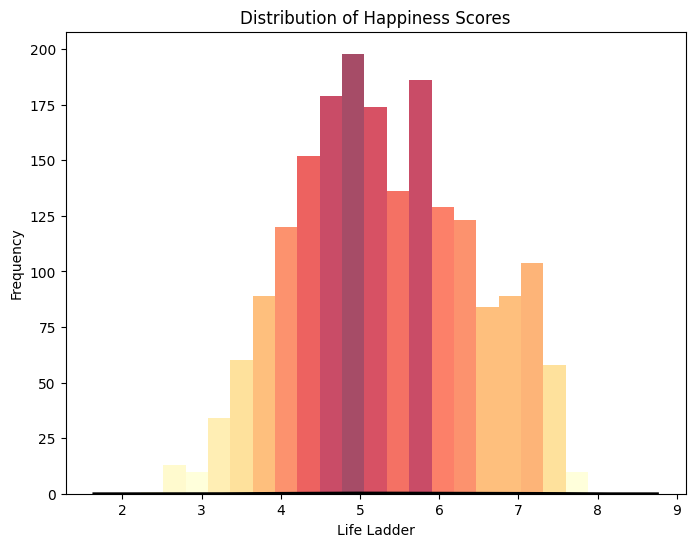

In [ ]:
# Histgram plotting for Life Ladder score
colors = plt.cm.YlOrRd(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

counts, bins = np.histogram(df['Life Ladder'], bins=20)

for count, x in zip(counts, bins):
    plt.bar(x, count, width=bins[1] - bins[0], color=colors[int(count / max(counts) * (len(colors) - 1))], alpha=0.7)


sns.kdeplot(df['Life Ladder'], color='black', linewidth=2)

plt.title('Distribution of Happiness Scores')
plt.xlabel('Life Ladder')
plt.ylabel('Frequency')
plt.show()

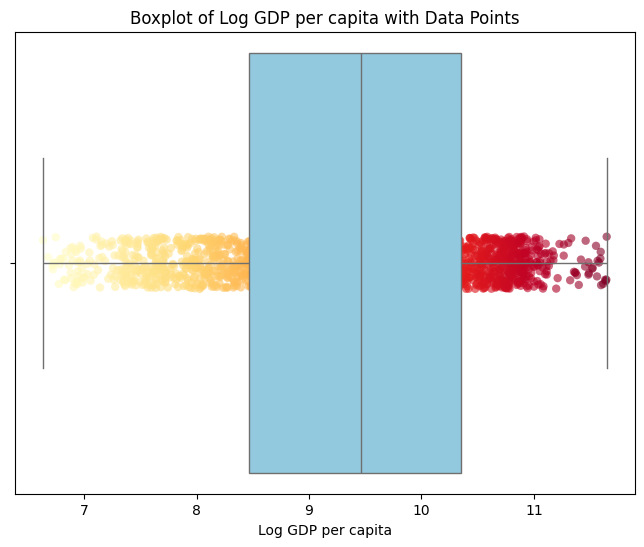

In [ ]:
# Boxplot with data points to check if there are any outliers value in Log GPD column
df = df.dropna(subset=['Log GDP per capita'])

colors = plt.cm.YlOrRd((df['Log GDP per capita'] - df['Log GDP per capita'].min()) /
                        (df['Log GDP per capita'].max() - df['Log GDP per capita'].min()))

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Log GDP per capita'], color="skyblue")

# Create a small random noise for the y-values
y_offsets = np.random.uniform(low=-0.05, high=0.05, size=len(df))

# Plotting the scatter points
plt.scatter(df['Log GDP per capita'], y_offsets, color=colors, alpha=0.6, edgecolor='none')

plt.title('Boxplot of Log GDP per capita with Data Points')
plt.xlabel('Log GDP per capita')
plt.show()

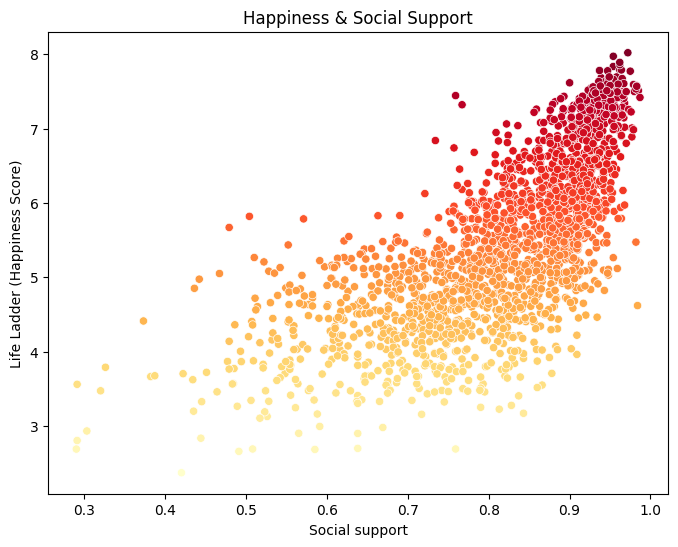

In [ ]:
# Scatter plot for Life Ladder & Social support
plt.figure(figsize=(8,6))
sns.scatterplot(x='Social support', y='Life Ladder', data=df,
                hue='Life Ladder', palette='YlOrRd', legend=None)
plt.title('Happiness & Social Support')
plt.xlabel('Social support')
plt.ylabel('Life Ladder (Happiness Score)')
plt.show()

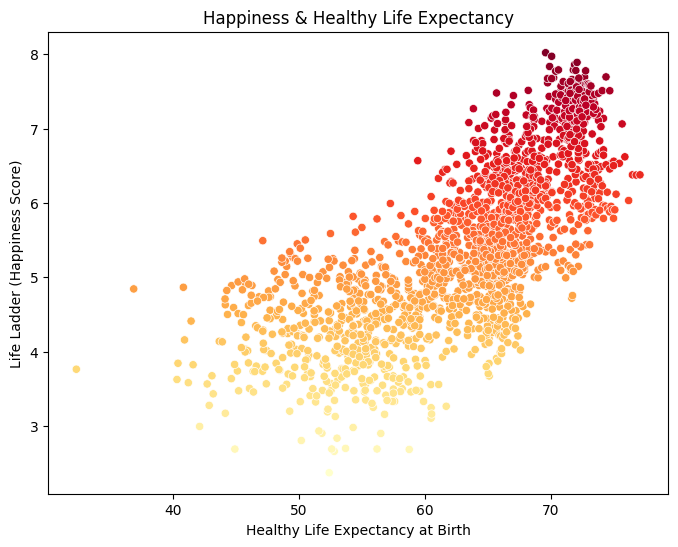

In [ ]:
# Scatter plot for Life Ladder & Healthy Life Expectancy at Birth
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Healthy life expectancy at birth', y='Life Ladder', data=df,
                hue='Life Ladder', palette='YlOrRd', legend=None)
plt.title('Happiness & Healthy Life Expectancy')
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Life Ladder (Happiness Score)')
plt.show()

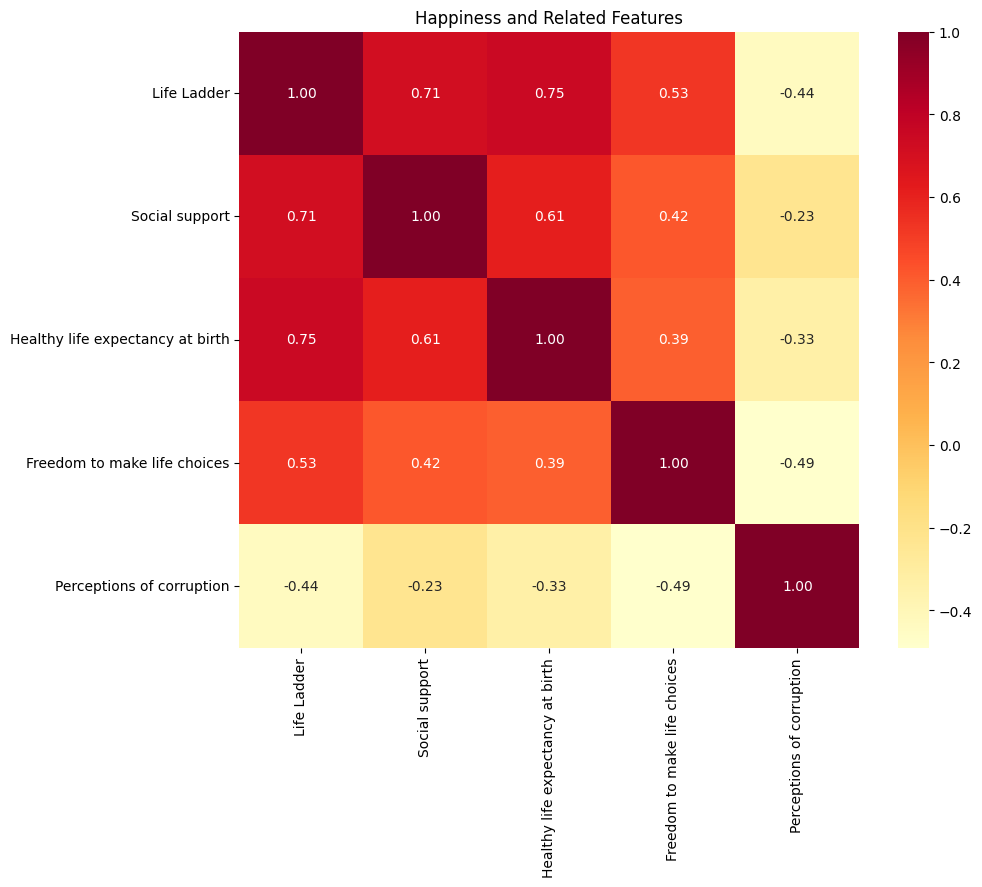

In [ ]:
# Correlation Heatmap for Life Ladder & Other Features
plt.figure(figsize=(10,8))
corr_matrix = df[['Life Ladder', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Perceptions of corruption']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', fmt=".2f")
plt.title('Happiness and Related Features')
plt.show()

<ipython-input-22-d7219f99e118>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='Life Ladder', data=df, ci=None, palette='YlOrRd')
<ipython-input-22-d7219f99e118>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='Life Ladder', data=df, ci=None, palette='YlOrRd')


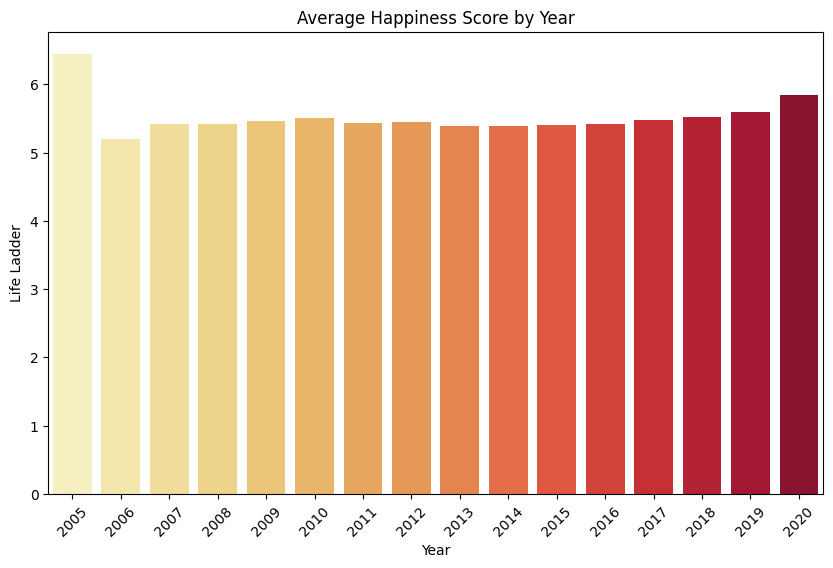

In [ ]:
# Bar plot for Average Life Ladder by Year
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Life Ladder', data=df, ci=None, palette='YlOrRd')
plt.title('Average Happiness Score by Year')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Choropleth Map for Happiness Score by Country
fig = px.choropleth(
    df,
    locations='Country name',
    locationmode='country names',
    color='Life Ladder',
    hover_name='Country name',
    animation_frame='year',
    color_continuous_scale='YlOrRd',
    title='Happiness Score by Country Over Time'
)

fig.show()

# **5.Preprocssing**

In [ ]:
# Outlier detection
# Convert specified columns to numeric types, coercing errors to NaN
for col in ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Life Ladder']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calculate the first quartile (Q1), which is the 25th percentile
Q1 = df.quantile(0.25, numeric_only=True)

# Calculate the third quartile (Q3), which is the 75th percentile
Q3 = df.quantile(0.75, numeric_only=True)

# Calculate the Interquartile Range (IQR), which is the difference between Q3 and Q1
IQR = Q3 - Q1

# Remove outliers for each specified column
for col in ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Life Ladder']:
    df = df[~((df[col] < (Q1[col] - 1.5 * IQR[col])) | (df[col] > (Q3[col] + 1.5 * IQR[col])))]

<ipython-input-24-32ee5b9ec8eb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Normalization
# Select specific features from the DataFrame to normalize
features = df[['Log GDP per capita', 'Social support',
    'Healthy life expectancy at birth', 'Freedom to make life choices']]


# Initialize the Min-Max Scaler, which will scale features to a range of [0, 1]
scaler = MinMaxScaler()

# Fit the scaler to the selected features and transform them into a scaled format
df_scaled = scaler.fit_transform(features)


In [ ]:
# Scaling
# Initialize the StandardScaler, which standardizes features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler to the selected columns and transform them into a standardized format
df_scaled = scaler.fit_transform(df[['Log GDP per capita', 'Social support',
                                      'Healthy life expectancy at birth',
                                      'Freedom to make life choices']])

# Convert the scaled NumPy array back into a DataFrame, preserving the column names
df_scaled = pd.DataFrame(df_scaled, columns=['Log GDP per capita', 'Social support',
                                             'Healthy life expectancy at birth',
                                             'Freedom to make life choices'])

In [ ]:
# Fill the missing values with mean
df['Log GDP per capita'].fillna(df['Log GDP per capita'].mean(), inplace=True)
df['Social support'].fillna(df['Social support'].mean(), inplace=True)
df['Healthy life expectancy at birth'].fillna(df['Healthy life expectancy at birth'].mean(), inplace=True)
df['Freedom to make life choices'].fillna(df['Freedom to make life choices'].mean(), inplace=True)

<ipython-input-27-78dde6aadf30>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-27-78dde6aadf30>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

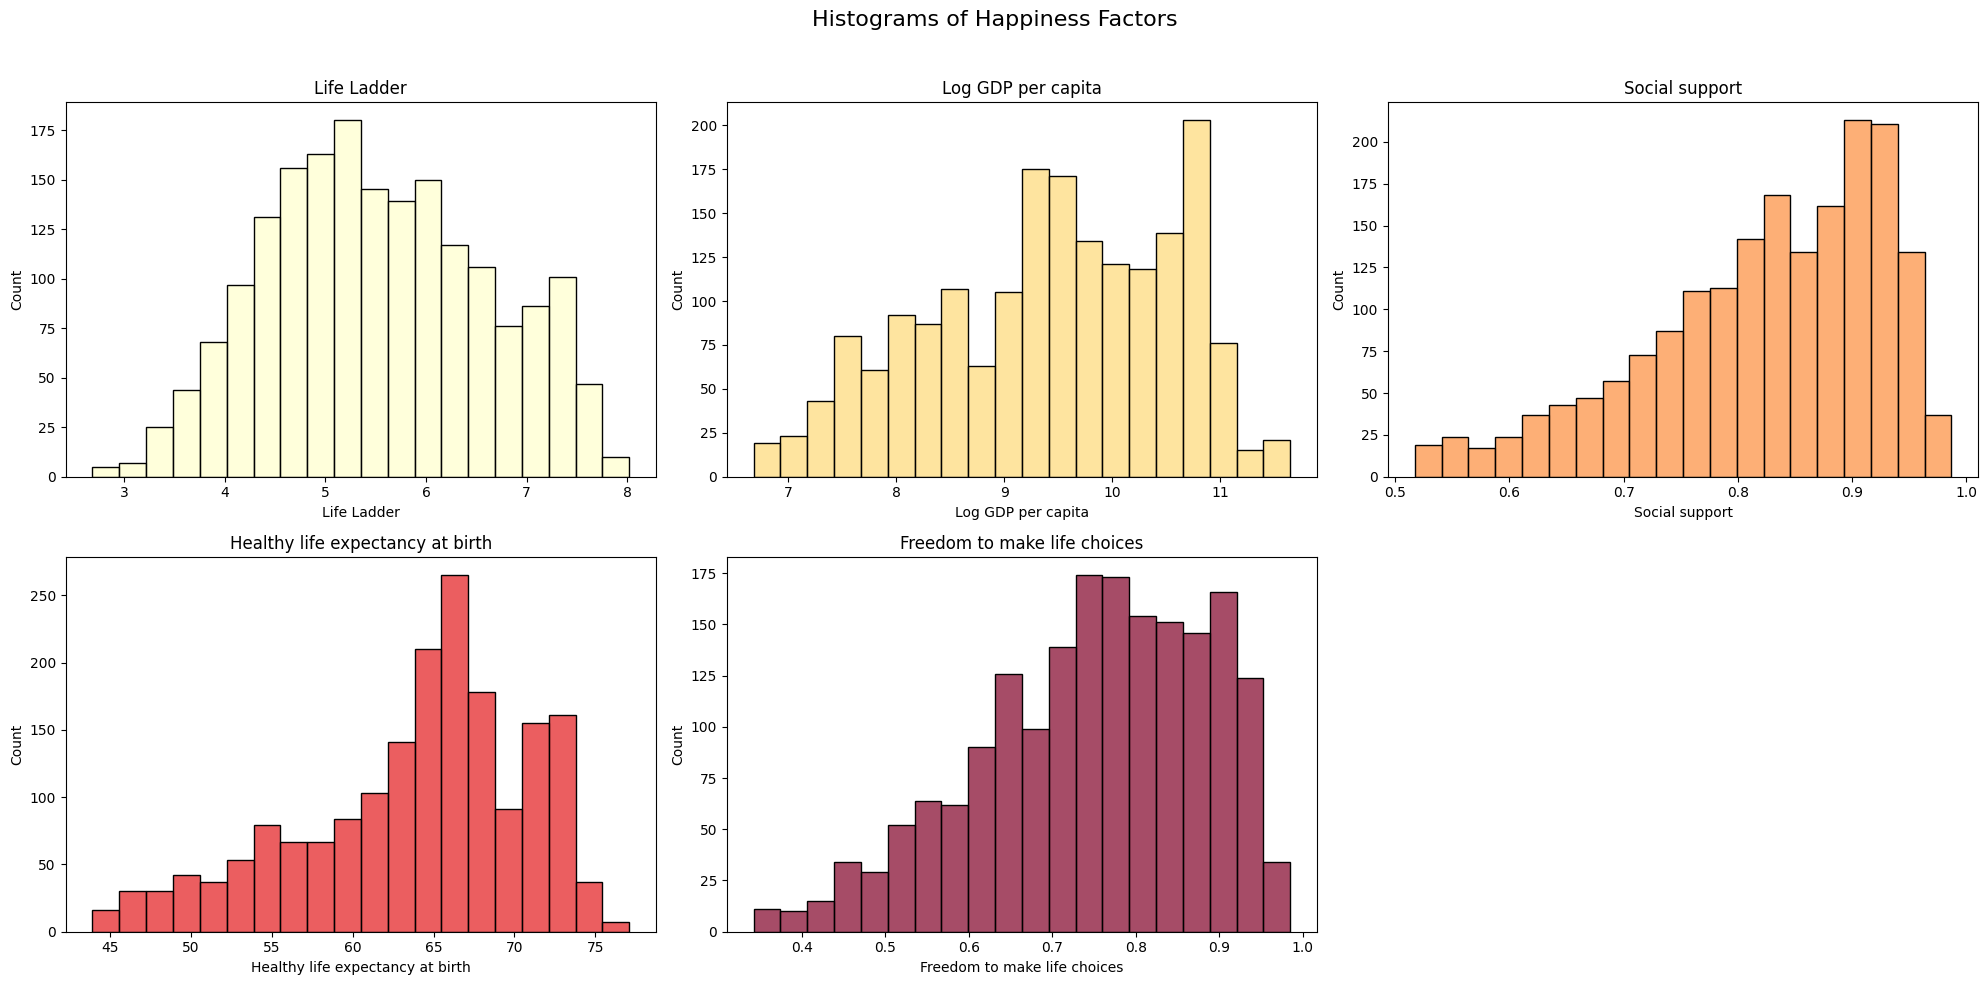

In [ ]:
# Plotting after preprossing
features = ['Life Ladder', 'Log GDP per capita', 'Social support',
            'Healthy life expectancy at birth', 'Freedom to make life choices']

bins = 20
cmap = plt.get_cmap("YlOrRd", len(features))

plt.figure(figsize=(20, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], bins=bins, color=cmap(i), kde=False, alpha=0.7)
    plt.title(feature)

plt.suptitle('Histograms of Happiness Factors', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Adding interaction terms

# Create a new column 'GDP_Social' as the product of 'Log GDP per capita' and 'Social support'
df['GDP_Social'] = df['Log GDP per capita'] * df['Social support']

# Create another column 'Health_Support' as the product of 'Healthy life expectancy at birth' and 'Social support'
df['Health_Support'] = df['Healthy life expectancy at birth'] * df['Social support']

# **Machine Learning Model:**
**Linear Regression** is suitable  to model the drivers of happiness at nation-state level, due to its simplicity, interpretability, and effectiveness. It shows the relationship between predictors-GDP and social support for example-and the happiness score through coefficients that are rather easy to interpret. Being a simple model, it acts like a very important baseline through which to assess the performance of more complex algorithms. Most of the assumptions are met in many data sets, hence it provides quite accurate predictions, computationally efficient and at the same time lower risk of overfitting. Besides, linear regression could easily be extended with regularization techniques if needed. In general, even though it cannot generalize such complex nonlinear relationships, it would serve as a good starting point to understand and explore the data.


**Random Forest Regression** is a powerful ensemble learning technique that is well-suited for modeling complex relationships in datasets, including those exploring the drivers of happiness at the nation-state level. Unlike Linear Regression, which assumes a linear relationship among variables, Random Forest can capture non-linear interactions between predictors and the happiness score, making it a valuable tool for this type of analysis.The flexibility of Random Forest allows it to consider a wide array of predictors—such as GDP, social support, and other socio-economic factors—without the need for explicit transformations. Each tree in the forest contributes to the final prediction by averaging the outputs, which mitigates the impact of outliers and reduces variance, leading to more robust predictions.



In [ ]:
X = df[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices','GDP_Social','Health_Support']]
y = df['Life Ladder']

In [ ]:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) between the actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score, which indicates the proportion of variance explained by the model
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics with formatting for better readability
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.3093
R-squared: 0.7505


# **Hyperparameter tuning**
1. **Ridge Regression** adds a penalty term proportional to the square of the coefficient magnitudes, helping to shrink the coefficients and prevent overfitting.
2. **Lasso Regression** uses a penalty term proportional to the absolute value of the coefficients, encouraging sparsity and feature selection.

In [ ]:
ridge_model = Ridge()
lasso_model = Lasso()

In [ ]:
# Retrieve the current set of parameters for the model
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
# Define the hyperparameter search space
param_space = {
    # Whether to create a copy of the input data (X) or use the original
    'copy_X': [True, False],

    # Whether to fit an intercept term or not
    'fit_intercept': [True, False],

    # Number of parallel jobs to use for computation (-1 means use all available cores)
    'n_jobs': [1, 5, 10, 15, None],

    # Whether to constrain the coefficients to be positive
    'positive': [True, False]
}

In [ ]:
# Set up the models and their parameters for tuning
models = {
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

param_grid = {
    'Ridge': {'alpha': [0.1, 1, 1, 100]},
    'Lasso': {'alpha': [0.1, 1, 1, 100]}
}

best_models = {}

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[model_name], scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_models[model_name] = grid_search.best_estimator_

    # Predict on the test set with the best model
    y_pred = best_models[model_name].predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} - Best parameters: {grid_search.best_params_}")
    print(f"{model_name} - Mean Squared Error: {mse}")
    print(f"{model_name} - R-squared: {r2}\n")

Ridge - Best parameters: {'alpha': 0.1}
Ridge - Mean Squared Error: 0.31228575977102424
Ridge - R-squared: 0.748082677301663

Lasso - Best parameters: {'alpha': 0.1}
Lasso - Mean Squared Error: 0.3887284813880732
Lasso - R-squared: 0.6864172149262375



In [ ]:
# Perform cross-validation with the model on the data
# The cv=5 means 5-fold cross-validation will be used to assess the model's performance
scores = cross_val_score(model, X, y, cv=5)

# Output the cross-validation scores for each fold
print(f'Cross-validation scores: {scores}')


Cross-validation scores: [0.69197182 0.69185694 0.66283727 0.61691485 0.61608436]


# **Testing another algorithms to compare accuracy**

In [ ]:
# Create the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.2202
R-squared: 0.8223


# **Hyperparameter Tuning**

 we utilized the RandomForestRegressor from the sklearn.ensemble module to model the relationship between various predictors and the target variable.
** (n_estimators**), the maximum number of features considered at each split

** (max_features)**, the maximum depth of each tree
 (max_depth), the minimum number of samples required to split an internal node

 (min_samples_split), the minimum number of samples required at each leaf node

 (min_samples_leaf), and whether bootstrap samples are used (bootstrap).

In [ ]:
# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid with valid values for max_features
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)] + [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

pprint(random_grid)

# Set up the RandomizedSearchCV with fewer iterations and folds
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               n_iter=50,
                               cv=2,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1)
# Fit the model
rf_random.fit(X_train, y_train)

# Output the best parameters and score
print("Best Parameters:\n", rf_random.best_params_)
print("Best Score (MSE):", rf_random.best_score_)

# Predict with the best estimator
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

# Compute and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on training data:", mse)


# Compute and print the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared on training data:", r2)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
Fitting 2 folds for each of 50 candidates, totalling 100 fits
Best Parameters:
 {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': True}
Best Score (MSE): 0.7879799359981303
Mean Squared Error on training data: 0.21802910623477076
R-squared on training data: 0.8241184332156313


# **Conclusion**
The performance metrics of both models reflect their ability to capture this relationship. The Linear Regression model produced a Mean Squared Error (MSE) of 0.3093 and an R-squared value of 0.7505. This indicates that the model effectively explains a significant portion of the variability in happiness scores, aligning well with the linear nature of the data.

On the other hand, the Random Forest Regression model achieved a lower MSE of 0.2202 and a higher R-squared value of 0.8223. While it is designed to handle more complex, non-linear relationships, its superior performance in this linear context suggests that it can still effectively optimize predictions, likely by providing additional robustness against noise in the data.